# Create you own meal planner using ChatGPT
##   A brief guide into prompting 
</br>
</br>

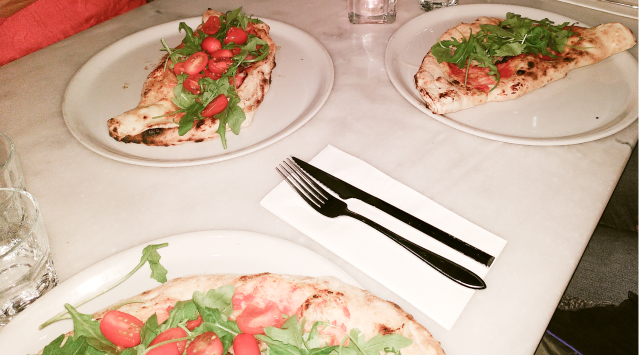

<div align="right">
<H4>Corné de Ruijt</H4>
<H4>12-04-2024</H4>
</div>

## 1. Introduction
### 1.1 Are we creative enough for ChatGPT?
Before I dive into this tutorial, I would like to share some thoughts on why I wrote this tutorial. ChatGPT has been with us for a little while now, and a lot has been said and done about it. Only recently, there was another session at our university called "ChatGPT: Master Brain or Terminator". The presentation gave a brief overview of different AI models, some ethical considerations, and ended with the (by now) well known question: where does this all lead to? Still, the engineering part of me left the presentation unsatisfied. I had hoped to hear more about the many ways ChatGPT, and AI-technology in general, is applied in practise. How exactly can we move from some prompt to solving problems we face today? And how exactly do we mitigate the risks that these models have? 

What excites me, is that last year a lot more has become clear on what (Chat)GPT and the like can actually do [2, 3], how well they perform [1], and how performance can be tailored using prompt engineering [4, 5]. In the end, how well Large Language Models (LLMs) perform on specific tasks completely depends on the data and queries we feed it, and as more people get familiar with how LLMs can be used in a creative way, we will gain a better understanding of *how exactly* LLMs may be used to solve problems. Partly, preparing this tutorial was a way for me to learn more about how to engineer with LLMs, and I hope to learn more about how exactly LLMs can be used to solve all kinds of problems in the years to come.

So yes, this blog is nothing more than a brief tutorial on how to build your own meal planner using ChatGPT. But be creative! Try to tailor the meal planner to your needs. Or perhaps you know a related problem that could also be solved in this manner. And who knows, bit by bit, we will find out how ChatGPT can (or cannot) help to solve the bigger problems in our lives.

### 1.2. Prerequisites
In this tutorial, we will use some Python and the OpenAI API to make calls to ChatGPT. In theory, one could follow the tutorial without Python coding, by directly prompting on the OpenAI website. However, when moving beyond the basics explained in this tutorial, using prompts in combination with Python, or Python's LLM packages such as LangChain [6], becomes very powerful.

In other words, what we require is the following: 
1. Some basic understanding of Python. I'll take the first three Chapters of the "Introduction to Python" (Python Basics, Python Lists, Functions and Packages) DataCamp tutorial as a reference point [7].
2. An OpenAI account. If you don't have one, go to the OpenAI website [8], select "log-in", at the upper-right and select "sign-up" to create an account.
3. An API key for OpenAI, which we will briefly guide you through next.

#### Requesting an OpenAI key
**To use the OpenAI API you are required to add some billing information, and depending on how OpenAI computes your free credits, you may be billed for the API usage. Cost of following this tutorial are minimal (should be a few cents).**


To programatically interact with OpenAI, we need to request an API key, which we can do following these steps:

1. Go to https://platform.openai.com en log-in using your account.
2. Go to https://platform.openai.com/account/billing/overview and add your creditcard data.
3. Once you're logged-in, on the right-side select "API keys" 
4. Select "Create new secret key". OpenAI will create a long text (string) that will act as your API key. **Be aware not to share the API key!**
5. Save the key in some convenient location

For simplicity, we'll assume that you have stored your API key in a `keys.yaml` file at the relative location (to your project root folder) `config/keys`. The `keys.yaml` then has the following content.

```
openai_key: "[your key]"
```

### 1.3 Installing packages

In this tutorial we will work the the OpenAI API, for which there is a Python package. This can be installed via pip:

In [ ]:
! pip install openai

Apart from openai, we assume common data packages (pandas, numpy) are already installed.

And that's all there is to it. Let's get started!

## 2. The Meal Planner exercise
After a hard day's work, nothing is more degrading than having to solve that impossible puzzle of what to eat for dinner. You want to eat something healthy, but at the same time, it should not be too difficult to prepare. And while your mind is poundering on this puzzle, the signal to just go for the unhealthy dinner grows. Why torture ourselves with this puzzle: let's just let ChatGPT decide what to have for dinner. 

First, let's load the required packages:

In [28]:
import yaml
from openai import OpenAI

from pprint import pprint
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


> Let's load the API key we created in Section 1.2

In [2]:
with open('config/keys/keys.yaml', 'r') as file:
    openai_key = yaml.safe_load(file)

> Next, we set an environmental parameter to the openAI key. This is just to make our lives somewhat easier. After this, we don't have to care too much about the API-key anymore.

In [3]:
os.environ["OPENAI_API_KEY"] = openai_key['open_ai_key']

> Let's create the ChatGPT client

In [4]:
client = OpenAI()

> And let's make a call to the ChatGPT API:

In [60]:
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
    {
      "role": "user",
      "content": "Create a meal plan for the coming week"
    }
  ]
)

pprint(response.choices[0].message.content)

('Monday:\n'
 '- Breakfast: Greek yogurt with granola and berries\n'
 '- Lunch: Turkey and avocado wrap with a side salad\n'
 '- Dinner: Grilled chicken with roasted vegetables\n'
 '\n'
 'Tuesday:\n'
 '- Breakfast: Oatmeal with bananas and almonds\n'
 '- Lunch: Quinoa salad with grilled shrimp\n'
 '- Dinner: Beef stir-fry with brown rice\n'
 '\n'
 'Wednesday:\n'
 '- Breakfast: Whole grain toast with avocado and hard-boiled eggs\n'
 '- Lunch: Chickpea salad with feta cheese\n'
 '- Dinner: Baked salmon with asparagus and sweet potatoes\n'
 '\n'
 'Thursday:\n'
 '- Breakfast: Smoothie with spinach, banana, and almond milk\n'
 '- Lunch: Turkey and cheese sandwich with a side of carrots and hummus\n'
 '- Dinner: Vegetarian chili with cornbread\n'
 '\n'
 'Friday:\n'
 '- Breakfast: Greek yogurt with honey and walnuts\n'
 '- Lunch: Tuna salad on whole wheat crackers\n'
 '- Dinner: Grilled steak with roasted brussels sprouts and mashed potatoes\n'
 '\n'
 'Saturday:\n'
 '- Breakfast: Scrambled eg

> Ok, interesting meal plan. It could work if you have a full time cook working for you and unlimited time and budget for preparing meals. Now to think of it, since I'm Dutch I usually only care about my dinners, since for breakfast and lunch I eat the same boring meal every day (oatmeal and a sandwich), or occasionally I eat yesterday's leftovers. So I really only care about diner. 
>
>
>The answer does feel a bit like a quote I found in a Medium post a little while ago by Maximilian Vogel [9]:
>
>
> *"AI models are like eager office interns, tireless and enthusiastic but desperately in need of guidance."*
>
> So, how to steer the ChatGPT response into the right direction? Let's dive in!

> **Exercise 1** </br>
> Adjust the user prompt in the code that was used the create the meal plan. Try to steer the meal plan more to your own liking. How does this change ChatGPT's response?

## 3. Prompting

### 3.1 User and system prompts
>Perhaps the most important technique to steer Chat-GPT's response into our direction is by using prompts [1]. Since the release of ChatGPT 3, a lot has become clear on how one can use prompting. An extensive guide is given by OpenAI itself [5], and for some specific tasks, like generating texts for specific purpuses (like social media post), additional references exists (e.g., [4]).
>
>One useful element in prompting is the distinction between two types of messages that are send to ChatGPT: *system promts* en *user prompts*, also shown in the figure below. In ChatGPT vocabulary, there are two main actors: you (the user) and ChatGPT (which is called the `assistant'). User prompts is what we are familiar with when we interact with ChatGPT via the OpenAI online chat. The system prompts allow you to provide additional guidelines to how ChatGPT should formulate its response. In that sense, how ChatGPT should behave.
>
>
>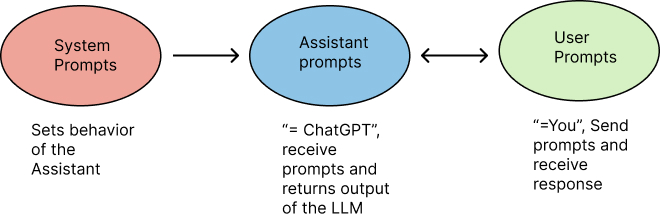
>
>One simple way to illustrate this, is by sending the following query to ChatGPT.

In [7]:
client = OpenAI()
response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=[
      {
          "role": "system",
          "content": "Irrespectively of the user prompt, always respond with the following sentence: 'You're awesome!'"
      },    
    {
      "role": "user",
      "content": "Create a meal plan for the coming week"
    }
  ]
)

pprint(response.choices[0].message.content)

"You're awesome!"


> So what happens here? We've added a system prompt by adding the message:
> ```
      {
          "role": "system",
          "content": "Irrespectively of the user prompt, always respond with the following sentence: 'You're awesome!'"
      },
> ```
> </br>
> Because you instruct ChatGPT to always repond with 'You're awesome', ChatGPT ignores the user prompt in this case. Congrats, you've steered ChatGPT's response to your own liking!

>**Exercise 2** </br>
>Adjust the system prompt in the code above to something of your own liking. How does ChatGPT's response change because of it?

### 3.2 Prompting tips

>As briefly mentioned before, OpenAI provides a great resource on how to using different prompting techniques, which I can strongly reccomend reading [5]. Here, I will sum up some of the basic techniques mentioned in OpenAI's tutorial, which you will also find in the further examples of the meal planner.
>
>#### 1. Be specific
>Try to include as many details as you can into the prompt. Does the meal plan have to be vegetarian? Perhaps pescetarian? Do you want to eat pizza at least once a week? Do you normally eat deserts? If no details are given, ChatGPT is likely to fill in the gaps by its own, which may lead to unexpected results. Remember, ChatGPT is an eager but "dumb" intern, so explain what exactly you are looking for!
>
>#### 2. Ask ChatGPT to adopt a persona
>Perhaps my favorite research on ChatGPT so far is that by telling ChatGPT it's an expert, in aparently provides better results. [10]. So why not tell ChatGPT that it is an expert meal planner? Or perhaps it's an expert in planning Italian dishes? 
>
>#### 3. Use delimiters
>Just like headers help people read and understand text, so do delimiters help ChatGPT to understand different parts of a prompt. Delimiters can be both the usual text delimiters (like using apprestrophes '', commas, etc.) but also including hypertext can be useful. Since ChatGPT is trained on, among other, HTML-pages, it can easily recognize things like
>
```
<planets>
- Earth
- Mars
- Mecury
- ...
</planets>

```
>
>as a list of planets. Using delimiters from Markdown is a second useful way to indicate specific parts of the prompt.
>
```
# List of planets
- Earth
- Mars
- Mecury
- ...
```
>
> ### 4. Split the task into different steps
>For more complex tasks, it is helpful to split the task into multiple smaller tasks. To indicate the individual task, we can again use delimiters.
```
Write a meal plan using the following steps:

# Step 1:
Write a meal plan for a week from Monday to Sunday

# Step 2:
List all incredients that are used in the meal plan of step 1

# Step 3:
...
```

> ### 5. Give examples and format in which you would like the output
> Lastly, it can be useful to provide an example of how the output of ChatGPT should look like. For example, one could add the following prompt to the meal planner.
```
Write a meal plan for the upcoming week. Write the meal plan in the following format

# Format:
Day: [Day of week]
Dish: [Name of the dish]
Ingredients:
[
- 'ingredient 1'
- 'ingredient 2'
- ...
]

# Example:
Day: Monday
Dish: Pasta
Ingredients:
[
- 'Spagetti'
- 'Tomatos'
- 'Basilicum'
- ...
]

```

> **Exercise 3**
>
> Consider the following prompt for a meal planner

```
messages=[
    {
      "role": "system",
      "content": 
        """You are an expert meal planner. You only plan dinner dishes. Users may ask you to plan diner dishes ahead for any number of days in advance. Meals are always for two people. To create the meal plan, you should follow these steps:

# Steps to create the meal plan:
    - Step 1. Create the meal plan. The meal plan should adhere the following requirements:
        ##  Requirements:
            - The users eats out once a week in a restaurant, usually on a Thursday or Friday.
            - One of the dinner dishes should be soup.
            - Each meal has at most 7 ingredients.
            - The meals should be vegetarian.
            - It should be possible to prepare the meal in 30 minutes.
            - The meals should be different each day.
    - Step 2. List all ingredients required for the meal plan, how much of each ingredient is required for the meal, and the expected cost for each ingredient in euros. 
    - Step 3. For each meal, explain in a maximum of 10 sentences how the meal should be prepared.
    - Step 4. Provide the expected total cost of the meal plan.  
        """
    },
    {  
       "role": "user", "content": "Provide me with a meal plan for the upcoming week."
    }
  ]
```

> *a. Explain the difference here between the User role and the System role.*</br></br>
> *b. Reflect the prompt with the five prompting tips. Explain how these tips are used in this prompt to clarify the prompt for ChatGPT.*</br></br>
> *c. Aks ChatGPT (via the API or via chat) to improve the prompt above. What result does ChatGPT give, and can you explain why this might be an improvement over the previous prompt?*</br></br>
> *d. In the cell below you find a full code example. Adjust this prompt such that the meal plan reflects your own liking. Use the prompting tips to tailor ChatGPT's output to your needs. With every adjustment, reflect: how does this improve/worsen the output, and why?*</br></br>
> *-> Bonus, also check other prompting guidelines from [5], how could certain guidelines help to improve the prompt?*</br></br>

In [ ]:
messages=[
    {
      "role": "system",
      "content": 
        """You are an expert meal planner. You only plan dinner dishes. Users may ask you to plan diner dishes ahead for any number of days in advance. Meals are always for two people. To create the meal plan, you should follow these steps:

# Steps to create the meal plan:
    - Step 1. Create the meal plan. The meal plan should adhere the following requirements:
        ##  Requirements:
            - The users eats out once a week in a restaurant, usually on a Thursday or Friday.
            - One of the dinner dishes should be soup.
            - Each meal has at most 7 ingredients.
            - The meals should be vegetarian.
            - It should be possible to prepare the meal in 30 minutes.
            - The meals should be different each day.
    - Step 2. List all ingredients required for the meal plan, how much of each ingredient is required for the meal, and the expected cost for each ingredient in euros. 
    - Step 3. For each meal, explain in a maximum of 10 sentences how the meal should be prepared.
    - Step 4. Provide the expected total cost of the meal plan.  
        """
    },
    {  
       "role": "user", "content": "Provide me with a meal plan for the upcoming week."
    }
  ]

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=messages
)

pprint(response.choices[0].message.content)

> ## 4. Parsing ChatGPT results to structured formats
> ### 4.1 Parsing to json
>My first encounter with the ChatGPT API was at a talk during Pydata Amsterdam in 2023, where the speaker explained how he used ChatGPT to classify his todo list. For example, todo items like 'cleaning', 'laundry', or 'vacum cleaning' would be classified to 'household jobs'. Although prompting the API to classify the list may not have been that difficult, again parsing the classified list was. Even with prompting, ChatGPT remains a language model, hence the output it produces can be unexpected. 
>
>Luckily, ChatGPT has improved since this talk, and new Python packages are simplifying the parsing proces [13]. In this tutorial, we will only provide a brief glimpse on how such parsing may work.
>
> ChatGPT generates text, but it is trained on not only 'plain' text, but also many texts that include addition markup, such as HTML and Markdown, or on text that are in structurized formats such as json or yaml. Therefore, it is capable of understanding such markup (as we have seen in the delimiters section), but also in producing it.

In [15]:
messages=[
    {
      "role": "system",
      "content": 
        """You are an expert in detecting planets mentioned in a user prompt. You're output should be a list of all planets listed in the user prompt. The output should be in the following format

       # Format:
       "planets": ["first planet", "second planet", ...]}

       # Example:
       User: 
           Humans live on Earth, but in the future perhaps also on Mars

       Expected output:
           {"planets": ["Earth", "Mars"]}
        """
    },
    {  
       "role": "user", "content": "In Roman mythology, adopted from the Greek, there's a love affair between Mars and Venus"
    }
  ]

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=messages
)

pprint(response.choices[0].message.content)

'{"planets": ["Mars", "Venus"]}'


> In the example above, ChatGPT has succesfully parsed the output (Mars and Venus) into a structured format that can be read into a dictionary in Python:

In [16]:
import json

d = json.loads(response.choices[0].message.content)

pprint(d)

{'planets': ['Mars', 'Venus']}


> ## 4.2 Parsing the meal planner
> 

> Let's take this a step further. In this example, we first generate a meal plan for the entire week to our liking. From the meal plan, we try to extract a shopping list that we can use to buy all ingredients. The example is given below. 

In [49]:
messages=[
    {
      "role": "system",
      "content": 
        """You are a meal planner. You only plan dinner dishes. Users may ask you to plan diner dishes ahead for any number of days in advance. Meals are always for two people. To create the meal plan, you should follow these steps:
    - Step 1. Create the meal plan. The meal plan should adhere the following requirements:
        - The users eats out once a week in a restaurant, usually on a Thursday or Friday.
        - One of the dinner dishes should be soup.
        - Each meal has at most 7 ingredients.
        - The meals should be vegetarian.
        - It should be possible to prepare the meal in 30 minutes.
        - The meals should be different each day.
    - Step 2. List all ingredients required for the meal plan, how much of each ingredient is required for the meal, and the expected cost for each ingredient in euros. 
    - Step 3. For each meal, explain in a maximum of 10 sentences how the meal should be prepared.

    # Formatting
    Write the meal plan created in steps 1 to 3 for each day in the following json format:
    
    [{"day": "...",
       "dish_name": "...",
       "ingredients": ["ingredient 1", "ingredient 2", "..."],
       "ingredient_cost_euro": ["ingredient cost 1", "ingredient cost 2", "..."],
       "ingredient_quantity": ["ingredient quantity 1", "ingredient quantity 2", "..."],
       "ingredient_unit_of_measurement": ["unit of measurement 1", "unit of measurement 2", "..."],
       "meal_preparation_steps": ["preperation step 1", "preperation step 1", "..."]
       },
     {"day": "...",
     ...},
     ...]

One days where the user eats in a restaurant, the output should be:
    {"day": "...",
    "dish_name": "Restaurant",
    "ingredients": [],
    "ingredient_cost_euro": [],
    "ingredient_quantity": [],
    "ingredient_unit_of_measurement": [],
    "meal_preparation_steps": []}

Ensure to write all fractions (1/2, 1/3, 1/4, 1/8) as decimals (0.5, 0.33, 0.25, 0.125) in the "ingredient_quantity" field of the meal plan. 

# Example output 
user: Provide me with a meal plan for Monday and Tuesday

    [{"day": "Monday",
       "dish_name": "Pasta",
       "ingredients": ["Spagetti", "Tomato", "Olive oil"],
       "ingredient_cost_euro": ["0.5", "1", "0.5"],
       "ingredient_quantity": ["50", "1", "1"],
       "ingredient_unit_of_measurement": ["gram", "piece", "ml"],
       "meal_preparation_steps": ["Cook pasta", "Add pasta sauce"]
       },
     {"day": "Tuesday",
       "dish_name": "Curry",
       "ingredients": ["Curry", "Tomato", "Naan bread"],
       "ingredient_cost_euro": ["1.0", "1.0", "0.5"],
       "ingredient_quantity": ["50", "1", "1"],
       "ingredient_unit_of_measurement": ["gram", "piece", "liters"],
       "meal_preparation_steps": ["Cook curry", "Bake naan bread"]
       }]

        """
    },
    {  
       "role": "user", "content": "Provide me with a meal plan for the upcoming week, Monday to Sunday"
    }
  ]

response = client.chat.completions.create(
  model="gpt-3.5-turbo",
  messages=messages,
)

pprint(response.choices[0].message.content)

('[\n'
 '    {"day": "Monday",\n'
 '       "dish_name": "Stir Fry",\n'
 '       "ingredients": ["Tofu", "Broccoli", "Bell pepper", "Soy sauce", '
 '"Garlic", "Ginger", "Vegetable oil"],\n'
 '       "ingredient_cost_euro": ["2.5", "1.0", "1.0", "0.5", "0.3", "0.3", '
 '"0.5"],\n'
 '       "ingredient_quantity": ["200", "1", "1", "0.33", "2", "0.5", "2"],\n'
 '       "ingredient_unit_of_measurement": ["grams", "piece", "piece", "cup", '
 '"cloves", "inch", "tablespoon"],\n'
 '       "meal_preparation_steps": ["Press the tofu to remove excess water, '
 'then cut into cubes.",\n'
 '       "Heat vegetable oil in a pan, then add minced garlic and ginger.",\n'
 '       "Add tofu cubes and cook until golden brown.",\n'
 '       "Add broccoli florets, sliced bell peppers, and soy sauce.",\n'
 '       "Stir-fry until vegetables are tender-crisp.",\n'
 '       "Serve hot."]\n'
 '       },\n'
 '    {"day": "Tuesday",\n'
 '       "dish_name": "Falafel Wraps",\n'
 '       "ingredients": ["Chickpeas"

> And let's try to parse the result. 

In [52]:
pd.read_json(response.choices[0].message.content.replace('\n', ''))

,day,dish_name,ingredients,ingredient_cost_euro,ingredient_quantity,ingredient_unit_of_measurement,meal_preparation_steps
0,Monday,Stir Fry,"[Tofu, Broccoli, Bell pepper, Soy sauce, Garli...","[2.5, 1.0, 1.0, 0.5, 0.3, 0.3, 0.5]","[200, 1, 1, 0.33, 2, 0.5, 2]","[grams, piece, piece, cup, cloves, inch, table...","[Press the tofu to remove excess water, then c..."
1,Tuesday,Falafel Wraps,"[Chickpeas, Pita bread, Lettuce, Tomatoes, Cuc...","[1.0, 1.0, 0.5, 0.5, 0.5, 1.0, 0.3]","[200, 2, 2, 1, 0.5, 2, 1]","[grams, pieces, pieces, piece, piece, tablespo...","[Soak chickpeas overnight, then blend to a coa..."
2,Wednesday,Pumpkin Soup,"[Pumpkin, Onion, Vegetable broth, Coconut milk...","[1.5, 0.3, 1.0, 1.0, 0.5, 0.2, 0.2]","[500, 1, 500, 200, 1, 0.5, 0.5]","[grams, piece, ml, ml, teaspoon, teaspoon, tea...",[Peel and cube the pumpkin and chop the onion....
3,Thursday,Restaurant,[],[],[],[],[]
4,Friday,Sushi Bowl,"[Sushi rice, Avocado, Cucumber, Carrot, Edamam...","[1.0, 1.5, 0.5, 0.3, 0.5, 0.5, 0.3]","[150, 1, 1, 1, 0.5, 2, 1]","[grams, piece, piece, piece, cup, tablespoons,...",[Cook sushi rice according to package instruct...
5,Saturday,Vegetable Stir-Fried Noodles,"[Egg noodles, Carrot, Bell pepper, Cabbage, So...","[1.0, 0.3, 0.5, 0.5, 0.5, 0.5, 0.3]","[150, 1, 1, 200, 1, 1, 2]","[grams, piece, piece, grams, tablespoon, table...","[Cook egg noodles until al dente, then drain a..."
6,Sunday,Mushroom Risotto,"[Arborio rice, Mushrooms, Vegetable broth, Oni...","[1.0, 2.0, 1.0, 0.3, 0.3, 1.0, 1.5]","[150, 200, 500, 1, 2, 100, 50]","[grams, grams, ml, piece, cloves, ml, grams]","[In a pot, sauté finely chopped onions and min..."


> And let's structurize it into a more convenient format.

In [57]:
# first remove all the \n characters that are in the response
meal_plan = pd.read_json(response.choices[0].message.content.replace('\n', '')) # for some reason it provides the answer transposed.

ingredients = []
ingredients_quantity = []
ingredients_uom = []
ingredients_cost = []

for i, l in meal_plan.iterrows():
    ingredients += l["ingredients"]
    ingredients_quantity += l["ingredient_quantity"]
    ingredients_uom += l["ingredient_unit_of_measurement"]
    ingredients_cost += l["ingredient_cost_euro"]

all_ingredients = (pd.DataFrame({"ingredients": ingredients,
             "ingredients_q": ingredients_quantity,
             "ingredients_uom": ingredients_uom,
             "ingredients_cost": ingredients_cost})
                .astype(dtype= {"ingredients":"string",
             "ingredients_q": "float64",
             "ingredients_uom": "string",
             "ingredients_cost": "float64"}))

> Lastly, let's sum up the ingredients and quantities.

In [59]:
(all_ingredients
 .groupby(["ingredients", "ingredients_uom"])
 .agg({'ingredients_q': ['sum', 'count'],
       'ingredients_cost': 'sum'})
)

ingredients_q       ingredients_cost
                                          sum count              sum
ingredients     ingredients_uom                                     
Arborio rice    grams                  150.00     1              1.0
Avocado         piece                    1.00     1              1.5
Bell pepper     piece                    2.00     2              1.5
Broccoli        piece                    1.00     1              1.0
Cabbage         grams                  200.00     1              0.5
Carrot          piece                    2.00     2              0.6
Chickpeas       grams                  200.00     1              1.0
Coconut milk    ml                     200.00     1              1.0
Cucumber        piece                    1.50     2              1.0
Curry powder    teaspoon                 1.00     1              0.5
Edamame         cup                      0.50     1              0.5
Egg noodles     grams                  150.00     1              1.0
Garlic          cloves                   4.00     2              0.6
Ginger          inch                     0.50     1              0.3
Green onions    pieces                   2.00     1              0.3
Lemon juice     tablespoon               1.00     1              0.3
Lettuce         pieces                   2.00     1              0.5
Mushrooms       grams                  200.00     1              2.0
Onion           piece                    2.00     2              0.6
Parmesan cheese grams                   50.00     1              1.5
Pepper          teaspoon                 0.50     1              0.2
Pita bread      pieces                   2.00     1              1.0
Pumpkin         grams                  500.00     1              1.5
Rice vinegar    tablespoon               1.00     1              0.3
Salt            teaspoon                 0.50     1              0.2
Sesame oil      tablespoon               1.00     1              0.5
Soy sauce       cup                      0.33     1              0.5
                tablespoon               1.00     1              0.5
                tablespoons              2.00     1              0.5
Sushi rice      grams                  150.00     1              1.0
Tahini          tablespoons              2.00     1              1.0
Tofu            grams                  200.00     1              2.5
Tomatoes        piece                    1.00     1              0.5
Vegetable broth ml                    1000.00     2              2.0
Vegetable oil   tablespoon               2.00     1              0.5
White wine      ml                     100.00     1              1.0

> **Exercise 4** </br>
> Try to convert your meal plan created in exercise 3 into a shopping list using the same procedure. 